In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
print("Customers Dataset:") #Display first 5 rows of Customers Dataset
print(customers.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [7]:
print("\nProducts Dataset:") #Display first 5 rows of Products Dataset
print(products.head())


Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [8]:
print("\nTransactions Dataset:") #Display first 5 rows of Transactions Dataset
print(transactions.head())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [11]:
#Checking for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [12]:
#So there are no missing values
print("\nSummary Statistics:") # Describing or Summarize the statistics of the dataset
print(customers.describe())
print(products.describe())
print(transactions.describe())


Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [13]:
#We want to know uniqueness of the dataset so we are checking this
#Unique values in categorical columns
print(customers['Region'].unique())
print(products['Category'].unique())

['South America' 'Asia' 'North America' 'Europe']
['Books' 'Electronics' 'Home Decor' 'Clothing']


In [17]:
#Merging the datasets for the deeper analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [21]:
#Now we are finding business insights
#Most 10 Popular Product
print("\nMost 10 Popular Products:")
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(popular_products.head(10))


Most 10 Popular Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [22]:
#Regions with highest revenue
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_region)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


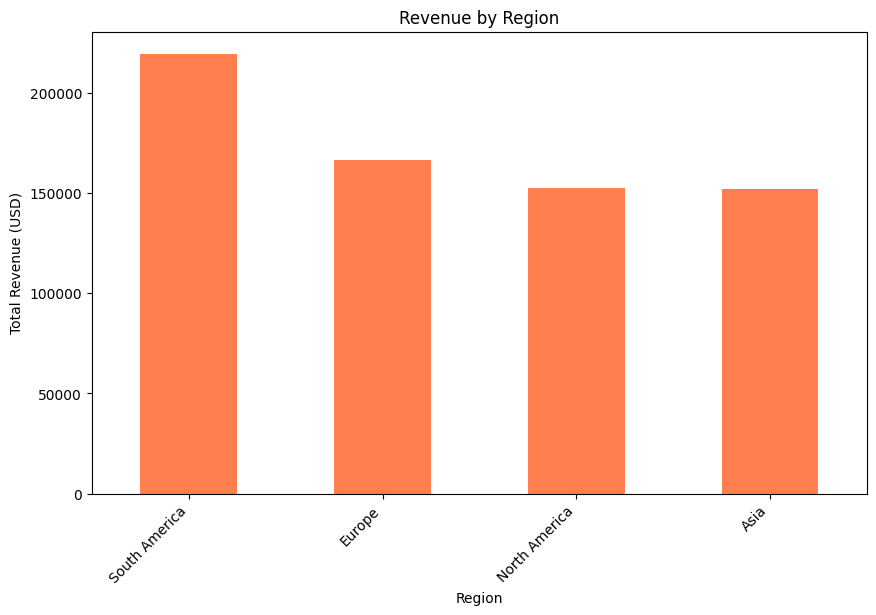

In [26]:
#So highest revenue is in South America
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='coral')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
#Monthly trends in transactions
#Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
#Extract month and year from TransactionDate
merged_data['Month'] = merged_data['TransactionDate'].dt.month
merged_data['Year'] = merged_data['TransactionDate'].dt.year
#Calculate the monthly sales
monthly_sales = merged_data.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
#Printing monthly sales trends
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
    Year  Month  TotalValue Year-Month
0   2023     12     3769.52    2023-12
1   2024      1    66376.39    2024-01
2   2024      2    51459.27    2024-02
3   2024      3    47828.73    2024-03
4   2024      4    57519.06    2024-04
5   2024      5    64527.74    2024-05
6   2024      6    48771.18    2024-06
7   2024      7    71366.39    2024-07
8   2024      8    63436.74    2024-08
9   2024      9    70603.75    2024-09
10  2024     10    47063.22    2024-10
11  2024     11    38224.37    2024-11
12  2024     12    59049.20    2024-12


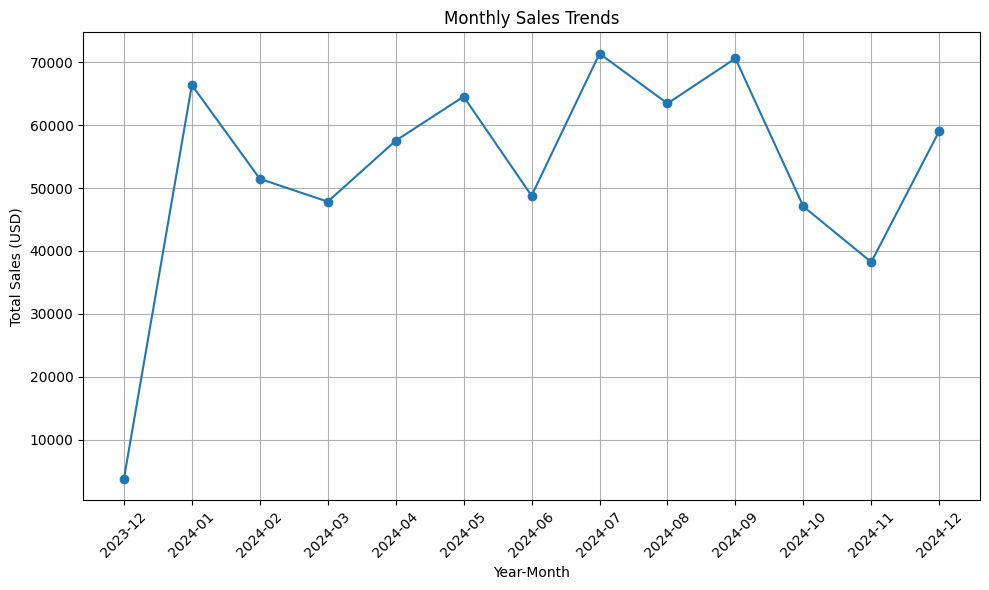

In [52]:
#Plotting the monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['TotalValue'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

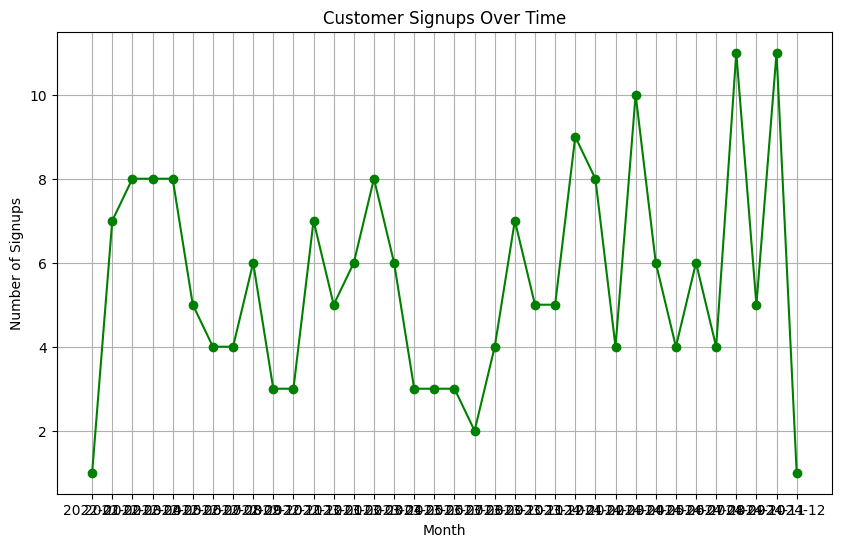

In [59]:
#Customer signups over time
signup_trends = customers.groupby(customers['SignupDate'].str[:7])['CustomerID'].count()
plt.figure(figsize=(10, 6))
plt.plot(signup_trends, marker='o', color='green')
plt.title('Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

In [69]:
#Calculating the total sales by product category
category_distribution = products['Category'].value_counts()
#Printing the best-performing product category
print("\nBest-Performing Product Category:")
print(category_distribution.idxmax(), "with total sales of", sales_by_category.max())


Best-Performing Product Category:
Books with total sales of 192147.47


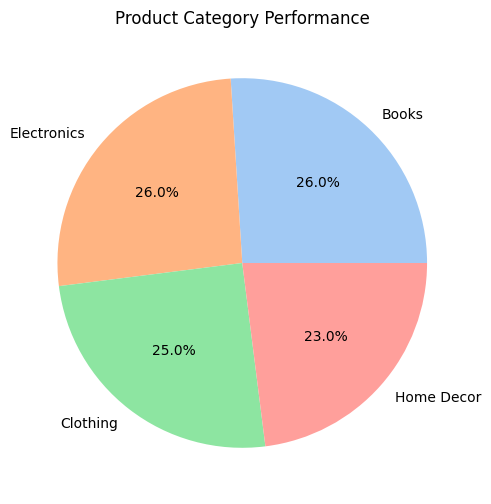

In [68]:
#Plotting the best performing product
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='pie', autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Product Category Performance')
plt.ylabel('')
plt.show()

In [71]:
#Calculating total spending per customer (Customer Lifetime Value) 
customer_lifetime_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
# Print the top 5 customers with the highest CLV
print("\nTop 5 Customers by Lifetime Value:")
print(customer_lifetime_value.head())


Top 5 Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
